# MTH5001: Introduction to Computer Programming 2018/19

## Final Report Project: "Networks"

### Instructions:

First, please type your name and student number into the Markdown cell below:

**Name:** Teresa Szalankiewicz

**Student number:** 170151805

You must write your answers in this Jupyter Notebook, using either Markdown or Python code as appropriate. (You should create new code and/or Markdown cells in the appropriate places, so that your answers are clearly visible.)

Your code must be well documented. As a rough guide, you should aim to include one line of comments for each line of code (but you may include more or fewer comments depending on the situation). You should also use sensible variable names, so that your code is as clear as possible. If your code works but is unduly difficult to read, then you may lose marks.

For this project, you will need to use the Python package [NetworkX](https://networkx.github.io/) extensively. However, to test your coding skills, in certain questions you will be restricted to using only specific functions. 
These restrictions are made clear below (see questions 4 and 8).

### Submission deadline:

You must submit your work via QMPlus (to the "Final Report Project" assignment in the "Final Report Project" section).

The submission deadline is **11:55pm on Monday 29 April, 2019**. Late submissions will be penalised according to the School's [guidelines](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=89105).

Your lecturers will respond to project-related emails until 5:00pm on Friday 26 April, 2019, only. You should aim to have your project finished by this time.

### Marking:

The project is worth 70% of your final mark for this module.

The total number of marks available for the project is 100. 

Attempt all parts of all questions.

When writing up your project, good writing style is even more important than in written exams. 
According to the [advice in the student handbook](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87786),

> To get full marks in any assessed work (tests or exams) you must normally not only give the right answers but also explain your working clearly and give reasons for your answers by writing legible and grammatically correct English sentences. Mathematics is about logic and reasoned arguments and the only way to present a reasoned and logical argument is by writing about it clearly. Your writing may include numbers and other mathematical symbols, but they are not enough on their own. You should copy the writing style used in good mathematical textbooks, such as those recommended for your modules. **You can expect to lose marks for poor writing (incorrect grammar and spelling) as well as for poor mathematics (incorrect or unclear logic).**

### Plagiarism warning:

Your work will be tested for plagiarism, which is an assessment offence, according to the [School's policy on Plagiarism](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87787). In particular, while only academic staff will make a judgement on whether plagiarism has occurred in a piece of work, we will use the plagiarism detection software "Turnitin" to help us assess how much of work matches other sources. You will have the opportunity to upload your work, see the Turnitin result, and edit your work accordingly before finalising your submission.

You may summarise relevant parts of books, online notes, or other resources, as you see fit.
However, you must use your own words as far as possible (within reason, e.g. you would not be expected to change the wording of a well-known theorem), and you **must** [reference](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87793) any sources that you use. Similarly, if you decide to work with other students on parts of the project, then you **must** write up your work individually. You should also note that most of the questions are personalised in the sense that you will need to import and manipulate data that will be unique to you (i.e. no other student will have the same data).

## Background information

In this project you will learn about a field of mathematics called [graph theory](https://en.wikipedia.org/wiki/Graph_theory). 
A **graph** (or **network**) is simply a a collection of **nodes** (or **vertices**), which may or may not be joined by **edges**. 
(Note that this is not the same as the 'graph' of a function.)

Graphs can represent all sorts of real-world (and, indeed, mathematical) objects, e.g. 

* social networks (nodes represent people, edges represent 'friendship'),
* molecules in chemistry/physics (nodes represent atoms, edges represent bonds),
* communications networks, e.g. the internet (nodes represent computers/devices, edges represent connections).

In this project we will only consider **undirected** graphs (see the above Wikipedia link for a definition).

Conventiently, Python has a package, called [NetworkX](https://networkx.github.io/), for constructing and analysing graphs. 
Let's look at an example. 
Below we create the famous [Petersen graph](https://en.wikipedia.org/wiki/Petersen_graph) and use some basic NetworkX functions to learn a bit about it.

In [1]:
# import NetworkX and other useful packages
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import networkx as nx

# create the Petersen graph, storing it in a variable called "PG"
PG = nx.petersen_graph()

Before we doing anything else, it would make sense to draw the graph, to get an idea of what it looks like. 
We can do this using the NetworkX function `draw_networkx` (together with our old favourtie, matplotlib).

C:\Users\Tee\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


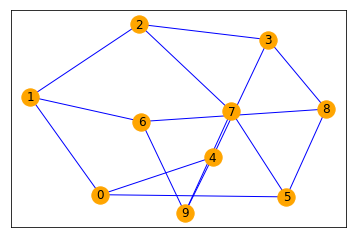

In [2]:
nx.draw_networkx(PG, node_color = 'orange', edge_color = 'blue', with_labels=True)
plt.xticks([])
plt.yticks([])
plt.show()

We can see that the graph has 10 nodes, labelled by the integers $0,1,\ldots,9$. 
It is also possible to label nodes with other data types, most commonly strings, but we won't do that in this project. 
The nodes of a graph can be accessed via the method `nodes()`:

In [3]:
PG.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

You can convert this to a Python list if you need to:

In [4]:
list(PG.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

This (hopefully) makes it clear that the node labels do in fact have type `int`, at least in our example.
You can also see from the picture that the graph has 15 edges. 
These can be accessed using the method `edges()`:

In [5]:
PG.edges()

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)])

Again, you can convert this to a list if you need to (try it), and you will see that the elements of the list are tuples. In either case, if you compare the output with the picture, it should become clear what it means, i.e. two nodes labelled $i$ and $j$ are joined by an edge if and only if the pair $(i, j)$ appears in `PG.edges()`. 

So far we haven't said much about how graphs are related to **mathematics**. It turns out that a graph can be completely defined by its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix). This is simply a matrix $A$ defined as follows: 

* $A$ has size $n \times n$, where $n$ is the number of nodes in the graph;
* if the nodes labelled $i$ and $j$ form an edge, then the $(i,j)$-entry of $A$ is $1$; if they don't form an edge, the $(i,j)$-entry of $A$ is $0$.

This idea is the foundation of [algebraic graph theory](https://en.wikipedia.org/wiki/Algebraic_graph_theory), a field of mathematics used to study graphs by analysing certain matrices.

Not surprisingly, you can compute the adjacency matrix of a graph using an appropriate NetworkX function. Let's do this for the Petersen graph:

In [6]:
A = nx.adjacency_matrix(PG)

Note that if you print this 'adjacency matrix' (try it), it doesn't actually look much like a matrix. This is because it doesn't have type `numpy.ndarray` like the matrices/arrays we've worked with in class:

In [7]:
type(nx.adjacency_matrix(PG))

scipy.sparse.csr.csr_matrix

However, you can convert it to a `numpy.ndarray` by calling the method `toarray()`:

In [8]:
A = A.toarray()

In [9]:
type(A)

numpy.ndarray

After doing this, the adjacency matrix looks like you would expect, so you can use all the usual `numpy.linalg` functions on it:

In [10]:
print(A)


[[0 1 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]]


Make sure that you understand what all these $0$'s and $1$'s mean: the $(i,j)$-entry of the adjacency matrix is $1$ if and only if the edges labelled $i$ and $j$ form an edge in the graph; otherwise, it is $0$. For example (remembering that Python starts counting from $0$, not from $1$): the $(0,4)$ entry is $1$, and in the picture above we see that nodes $0$ and $4$ form an edge; on the other hand, the $(1,7)$ entry is $0$, and accordingly nodes $1$ and $7$ don't form an edge.

You will be working with matrices related to graphs quite a lot in this project, so before you begin you should make sure that you understand what the code we've given you above is doing. 
You may also like to work through the official [NetworkX tutorial](https://networkx.github.io/documentation/stable/tutorial.html) before attempting the project, bearing in mind that not everything in the tutorial is relevant to the project. 
(Alternatively, Google for another tutorial if you don't like that one.)

**A final remark before we get to the project itself:**

You can rest assured that the graphs we consider this project all have the following nice properties:

* They are **connected**. This means that for every pair of nodes $i$ and $j$, there is a 'path' of edges joining $i$ to $j$. For example, the Petersen graph is connected, e.g. the nodes labelled $6$ and $7$ do not form an edge, but we can still reach node $7$ from node $6$ via the edges $(6,9)$ and $(9,7)$.
* They are **simple**. This means that there is never an edge from a node to itself.

You may come across these terms when you are researching the relevant mathematics for various parts of the project, so you should know what they mean.

## The project

As we have already mentioned, in this project you will make extensive use of the Python package [NetworkX](https://networkx.github.io/), which allows you to create and analyse graphs. 
You are expected to read the relevant parts of the NetworkX documentation, or otherwise learn how to use whatever Python functions you need to complete the project. 
However, the mini-tutorial which we have provided above should be enough to get you started.

You will also need to research and summarise some mathematics related to graphs, and to use your findings to write certain pieces of code 'from scratch', instead of of using NetworkX functions. 
In these cases (questions 4 and 8), it is **strongly recommended** that you use NetworkX to check your answers.

You should structure your report as follows:

### Part I: Data import and preliminary investigation [10 marks]

You have been provided with a Python file called **"data.py"** on QMPlus, which you should save in the same directory as this Jupyter notebook.
This file contains a function `create_graph` which constructs a random graph that you will be analysing throughout the project. 
By following the instructions in question 1 (below), you will create a graph that is unique to you, i.e. no two students will have the same graph.

**1. [5 marks]** Execute the following code cell to create your graph, storing it in a variable called `G` (you can change the variable name if you like, but we recommend leaving it as it is). You **must** replace the number "123456789" with your 9-digit student number. 

*Important note: If you do not do this correctly, you will score 0 for this question, and if you are found to have used the same input as another student (rather than your individual student number), then your submission will be reviewed for plagiarism.*

In [82]:
from data import create_graph

# Replace "123456789" below with your 9-digit student number

G = create_graph(170151805)

# Replace "123456789" above with your 9-digit student number

**2. [5 marks]** Draw your graph, and calculate how many nodes and edges it has. 

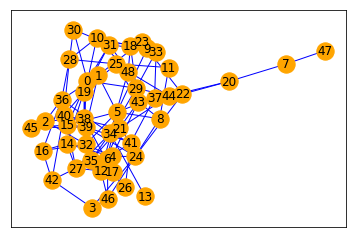

49
107


In [83]:
#PLEASE NOTE ALL COMMENTS ABOUT WORKING WILL BE UNDERNEATH THE LINE OF CODE IT IS ABOUT
nx.draw_networkx(G, node_color = 'orange', edge_color = 'blue', with_labels=True)
plt.xticks([])
plt.yticks([])
plt.show()
#drawing my graph called G
print(len(G.nodes()))
#counting amount of nodes
print(len(G.edges()))
#counting amount of edges

### Part II: Distance matrices and shortest paths [30 marks]

Many properties of graphs can be analysed by using matrices/linear algebra. 
The rest of your report will involve researching/summarising some of the relevant mathematics, and writing/using Python code to analyse certain properties of your graph from Part I. 
As explained above, you are allowed to summarise information from books and/or web pages, but you must use your own words and clearly reference any sources you use.

**3. [10 marks]** Explain what a "path" between two nodes in a graph is, and what the "distance" between two nodes is. Explain also what the "distance matrix" of a graph is, and how it can be computed using the adjacency matrix. 
Here you should discuss arbitrary (undirected, simple, connected) graphs, not your specific graph from Part I.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

***
The path between two nodes on a graph is the the sequence of edges between nodes that it takes to get from one node to another, usually assuming that each edge in the path taken is different and not repeated (1) and the distance between the beginning node and end node is the smallest amount of edges that it takes to get from one to another. Using these distances you can make up a distance matrix since it is a square matrix of all the distances from one node to another (2). 

If you iteratively power the adjacency martix A^k, then the entry A^k(i,j) is the number of walks of length k from i to j (3). Therefore to make the distance matrix, you assign the same entry of A^k ,(i,j) in a zeros matrix, the number k. However, as to not replace the entries that are already filled in, you make sure that you are only replacing the entries that are zero in the zeros matrix. 

$References:$

(1)Wikipediaorg. 2019. Wikipediaorg. [Online]. [25 April 2019]. Available from: https://en.wikipedia.org/wiki/Path_(graph_theory)

(2)Wolframcom. 2019. Wolframcom. [Online]. [25 April 2019]. Available from: http://mathworld.wolfram.com/GraphDistanceMatrix.html

(3)Stackoverflowcom. 2019. Stack Overflow. [Online]. [25 April 2019]. Available from: https://stackoverflow.com/questions/32164012/how-to-get-distance-matrix-from-adjacency-matrix-matlab
***

**4. [10 marks]** Write a function `distance_matrix` which computes the distance matrix of a graph. 
Your function should return a matrix, represented as an array of type `numpy.ndarray`, of the same shape as the adjacency matrix of the graph. 
You may use the NetworkX function `adjacency_matrix` to compute the adjacency matrix of the input graph, but you **must not use any other NetworkX functions**.

In [84]:
def distance_matrix(G):
    "returns the distance matrix of a node graph G"
    A = nx.adjacency_matrix(G).toarray()
    #Naming my adjacency matrix and making sure that it is in array form.
    B = np.zeros((len(G.nodes),len(G.nodes)))
    #Creating an empty matrix which will be used to put 'shortest length' values into.
    Ak = np.zeros((len(G.nodes),len(G.nodes)))
    #Creating an empty matrix that can be used when for the first power of A when iteratively powering A.
    for k in range(1,(len(G.nodes)+1),1):
        Ak=np.linalg.matrix_power(A,k)
        #Using a numpy function, I can iteratively power the adjacency matrix up to the number of nodes that is in my graph,
        #to find which nodes have paths of length k.
        for i in range(len(G.nodes)):
            for j in range(len(G.nodes)):
                if Ak[i,j]>0 and B[i,j]==0 :
                    B[i,j]=k 
                    #Here are  conditions on when elements of B can be replaced: if the (i,j) element of Ak (the Adjacency 
                    #matrix to the power k) is non-zero, (this shows that there is a path of length k in that position)
                    #and the corresponding element of B is zero(empty), (this ensures that previous entries won't be replaced 
                    #meaning it shows the shortest length) then place k in B in that same position.
    for i in range(len(G.nodes)):
        if B[i,i]>0:
            B[i,i]=0
            #Since I know that from node i to the same node i, the shortest path will be 0, I have put a condition that if
            #there is any non-zero number in the diagonal of the matrix, it will be replaced with zero since the diagonal is 
            #the position (i,i).
    return B

In [85]:
print(distance_matrix(G))
#Showing the distance matrix for my graph G.

[[0. 3. 2. ... 4. 5. 2.]
 [3. 0. 2. ... 3. 5. 3.]
 [2. 2. 0. ... 4. 7. 3.]
 ...
 [4. 3. 4. ... 0. 5. 4.]
 [5. 5. 7. ... 5. 0. 4.]
 [2. 3. 3. ... 4. 4. 0.]]


**5. [5 marks]** Using your function from Question 4, find a pair of nodes $(i,j)$ in your graph from Part I with the property that the distance from $i$ to $j$ is maximal amongst all pairs of nodes in the graph. 

Note: This means that for every *other* pair of nodes $(i',j')$, the distance from $i'$ to $j'$ is less than or equal to the distance from $i$ to $j$.

In [86]:
Dist=distance_matrix(G)
print('The maximal distance between two nodes is',D.max())
#Showing the maximum entry in my distance matrix.
for i in range(len(Dist)):
    for j in range(len(Dist)):
        if int(Dist[i,j])==D.max():
            ind = (i,j)
            #For i and j being within the size of my matrix D, if the (i,j) entry is the same as the maximum entry of D, I name 
            # the (i,j) tuple ind.
            break
            #Since there may be multiple entries that are the same as the maximum entry of D, I stop the loop since I only 
            #want one tuple.
print('One pair of nodes with the maximal distance is',ind)
#viewing my maximal distance tuple

The maximal distance between two nodes is 7.0
One pair of nodes with the maximal distance is (47, 2)


**6. [5 marks]** Find a shortest path between your nodes from Question 5, i.e. one with the shortest possible length, and re-draw your graph so that this path is clearly visible. 
You should use one colour for the nodes and edges in the path, and a different colour for all other nodes and edges. 

Hint: You should be able to find a NetworkX function that computes a shortest path.

In [87]:
shortest_path=nx.shortest_path(G, ind[0], ind[1])
#Finding the shortest path between the nodes with the maximal distance.
print(shortest_path)
shortest_path_edges=[(short[i],short[i+1]) for i in range(len(short)-1)]
#Writing the list of nodes as a list of edges.
print(shortest_path_edges)

[47, 7, 20, 44, 29, 0, 38, 2]
[(47, 7), (7, 20), (20, 44), (44, 29), (29, 0), (0, 38), (38, 2)]


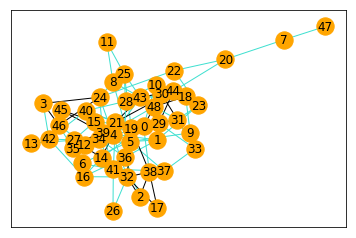

In [88]:
edge_colors1=['black' if edge in [(7, 47), (7, 20), (20, 44), (29, 44), (0, 29), (0, 38), (2, 38)] else 'turquoise' for edge in G.edges()]
#Creating a condition the the colours of the edges. If they are in the edge list, then they 
#will be black, otherwise they will be turquoise.
nx.draw_networkx(G, node_color = 'orange', edge_color =edge_colors3 , with_labels=True)
#Using my condition on the edge colours, I draw my graph again showing the edges that create the shortest path between (47,2)
plt.xticks([])
plt.yticks([])
plt.show()
#showing my graph

### Part III: Laplacian matrices and spanning trees [30 marks]

So far you have learned about two matrices associated with a graph: the adjacency matrix, and the distance matrix. Now you will study a third matrix: the Laplacian.

**7. [10 marks]** Explain what the "degree" of a node in a graph is, what the "Laplacian matrix" of a graph is, what a "spanning tree" of a graph is, and how the Laplacian matrix can be used to calculate the number of spanning trees in a graph. 
Here, again, you should discuss arbitrary (undirected, simple, connected) graphs, not your specific graph from Part I.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

***
The degree of a node in a graph is the number of edges that touch that node (1).

A Laplacian matrix is the matrix representation of a graph. For simple graphs, the matrix is found using the formula $L=D-A$ where $D$ is the degree matrix (a diagonal matrix showing  the degree of each vertex) and $A$ is the adjacency matrix (2). 

A spanning tree of a graph is a subgraph which contains all the nodes of the original graph but has the least amount of edges as possible (3). 

Therefore, to find the number of spanning trees of a graph using the Laplacian matrix, you use Kirchhoff's Theorem. It is given by any cofactor of the Laplacian matrix, meaning that you delete and row and any column of the Laplacian matrix and take the determinant of the remaining matrix (4).

$References:$

(1)Wikipediaorg. 2019. Wikipediaorg. [Online]. [25 April 2019]. Available from: https://en.wikipedia.org/wiki/Degree_(graph_theory)

(2)Wikipediaorg. 2019. Wikipediaorg. [Online]. [25 April 2019]. Available from: https://en.wikipedia.org/wiki/Laplacian_matrix

(3)Wikipediaorg. 2019. Wikipediaorg. [Online]. [25 April 2019]. Available from: https://en.wikipedia.org/wiki/Spanning_tree

(4)Wikipediaorg. 2019. Wikipediaorg. [Online]. [25 April 2019]. Available from: https://en.wikipedia.org/wiki/Kirchhoff's_theorem
***

**8. [10 marks]** Write a function `number_of_spanning_trees` which takes as input a graph $G$ and returns the number of spanning trees in $G$. You may use the NetworkX function `adjacency_matrix` to compute the adjacency matrix of the input graph, but you **may not use any other NetworkX functions**.

Note: You will probably need to compute the determinant of a certain matrix somewhere in your code. If you use the function `numpy.linalg.det` then your determinant will only be computed approximately, i.e. to a certain numerical precision. This is fine; you will not lose any marks if your code is otherwise correct.

In [89]:
def number_of_spanning_trees(G):
    "Calculates the number of spanning trees of graph G"
    A = nx.adjacency_matrix(G).toarray()
    #Making the adjacency matrix and making sure it is an array.
    E=A.sum(axis=1)
    #Summing up all the entries in the adjacency matrix along the rows if the entries are 1 since it gives you the degrees.  
    F=np.eye(len(G.nodes()))
    #Creating an identity matrix of the same size as the amount of nodes in my graph.
    D=F*E
    #Creating the degree matrix by multiplying the identity matrix by all the summed adjacency matrix values.
    L=D-A
    #Creating the Laplacian Matrix using the formula L=D-A as stated in the research.
    S=L[1:len(G.nodes()),1:len(G.nodes())]
    #Deleting row 0 and column 0 to be able to take a cofactor of the Laplacian matrix.
    return int(np.linalg.det(S))   
    #Returning the integer value of the determinant of S, since it is easier to read,to find the cofactor of the 
    #Laplacian matrix which gives the number of spanning trees in the graph.


**9 [5 marks]** Use your function from Question 8 to calculate the number of spanning trees in your graph from Part I.

In [90]:
print('The number of spanning trees in G is',number_of_spanning_trees(G))
#Using my function to count the number of spanning trees.

The number of spanning trees in G is 3888987192262005060796416


**10 [5 marks]** Find a minimal spanning tree of your graph from Part I, i.e. one with the smallest possible number of edges. Re-draw your graph in such a way that this spanning tree is clearly visible. You should use one colour for the edges in the spanning tree, and a different colour for all other edges. 

Hint: You should be able to find a NetworkX function that computes a minimal spanning tree.

In [91]:
min_span_tree=nx.minimum_spanning_tree(G)
#Using an nx function to find the minimum spanning tree of G.
edge_list2=sorted(min_span_tree.edges)
#Creating an edge list of the edges in the minimum spanning tree and sorting it so that it is easily readable.
print(edge_list)

[(0, 10), (0, 14), (0, 15), (0, 29), (0, 30), (0, 31), (0, 38), (1, 5), (1, 23), (1, 36), (1, 39), (2, 32), (2, 36), (2, 38), (3, 24), (3, 42), (3, 46), (4, 14), (4, 24), (4, 27), (4, 43), (5, 6), (5, 8), (5, 9), (5, 12), (5, 37), (6, 41), (7, 20), (7, 47), (8, 11), (9, 18), (9, 33), (10, 28), (10, 48), (11, 25), (12, 21), (12, 35), (13, 34), (14, 16), (15, 45), (17, 38), (19, 39), (19, 40), (20, 22), (20, 44), (21, 44), (26, 32), (27, 34)]


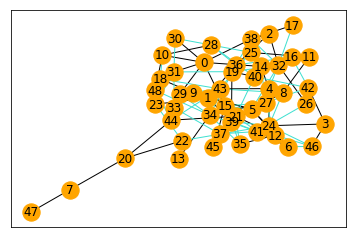

In [92]:
edge_colors2=['black' if edge in edge_list2 else 'turquoise' for edge in G.edges()]
#Creating a condition the the colours of the edges. If they are in the edge list of the minimum spanning tree, then they 
#will be black, otherwise they will be turquoise.
nx.draw_networkx(G, node_color = 'orange', edge_color =edge_colors2 , with_labels=True)
#drawing my graph using my conditional edge colour condition
plt.xticks([])
plt.yticks([])
plt.show()
#showing graph

### Part IV: Eigenvalues and triangles [30 marks]

By now you have seen that certain matrices associated with a graph can tell us a lot about the structure of the graph. 
In this final part of the project, you will investigate this further, by learning how eigenvalues can be used to reveal even more information about graphs.

**11. [5 marks]** Explain what a "triangle" in a graph is, and quote a formula for calculating the number of triangles in a graph from the eigenvalues of the adjacency matrix.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

***
A triangle in a graph is when 3 nodes are all connected by 3 edges to make a triangle.

To calculate the number of triangles in a graph, use the following formula. If $A$ is the adjacency matrix, then the number of triangles in a graph is $trace(A^3)/6$ where $trace(A)$ is the sum of elements on the main diagonal of the matrix $A$(1).

$References:$

(1)Geeksforgeeksorg. 2016. GeeksforGeeks. [Online]. [25 April 2019]. Available from: https://www.geeksforgeeks.org/number-of-triangles-in-a-undirected-graph/
***

**12. [5 marks]** Calculate the number of triangles in your graph from Part I, using the formula discussed in question 11. Your answer **must** be an integer.

Hint: What is the "trace" of a matrix and how is it related to the eigenvalues?

In [93]:
A = nx.adjacency_matrix(G).toarray()
#Making sure adjacency matrix is in array form.
A3=A@A@A
#Since I am using the formula that I researched, first I am calculating A^3.
diagA3=np.diagonal(A3)
#Naming the diagonal of A^3.
print('The number of traingles in G is',sum(diagA3)//6)
#First, I am summing the diagonals of be to take trace(A^3) and then dividing by 6 as the formula states. Since the answer
#must be an integer if put the // function however, without it, the answer is still 11 but it has a float (11.0) so I 
#included the // function.

The number of traingles in G is 11


**13. [10 marks]** Write a function `all_triangles` which finds all of the triangles in a graph. Use your function to count the number of triangles in your graph, and compare with your answer to question 12. (The two answers should, of course, be the same.)

Note: You will need to use your function in the next question, so you should think carefully about what kind of data structure you want it to output.

In [94]:
def all_triangles(G):
    "Shows all nodes of triangles as lists of 3 nodes"
    c_list=list(nx.clique.enumerate_all_cliques(G))
    #Finding a list of all cliques in my graph G, where a clique is a subset of the graph where every two edges are adjacent.
    triangles=[x for x in c_list if len(x)==3]
    #Using my list, I can find all of the cliques that are triangles since in a triangle all the edges have 
    #to be adjacent to eachother. They give the nodes that create the edges of the triangles.
    return triangles
print(all_triangles(G))
#Showing the nodes that are triangles in the graph as lists of 3 nodes.
print('The number of triangles in G is',(len(all_triangles(G))))
#Checking the amount of triangles in my graph which is in fact the same as in the previous question.

[[0, 30, 31], [2, 32, 38], [3, 24, 46], [4, 14, 27], [10, 18, 48], [12, 21, 35], [15, 39, 45], [17, 32, 38], [19, 32, 38], [21, 43, 44], [29, 43, 44]]
The number of triangles in G is 11


**14. [10 marks]** Re-draw your graph from Part I once more, so that all of its triangles are clearly visible. 
You should use one colour for the edges that appear in at least one triangle, and a different colour for all other edges.

In [95]:
edge_list3 = list()
for i in all_triangles(G):
  edge_list3.append((i[0], i[1]))
  edge_list3.append((i[1], i[2]))
  edge_list3.append((i[0], i[2]))
print(edge_list3)
#Since my list of triangles is a list of nodes, to create an edge list I need to append each element in each node list to the
#other two to get a list of tuples which represent the edges that create the triangle in the graph.
       

[(0, 30), (30, 31), (0, 31), (2, 32), (32, 38), (2, 38), (3, 24), (24, 46), (3, 46), (4, 14), (14, 27), (4, 27), (10, 18), (18, 48), (10, 48), (12, 21), (21, 35), (12, 35), (15, 39), (39, 45), (15, 45), (17, 32), (32, 38), (17, 38), (19, 32), (32, 38), (19, 38), (21, 43), (43, 44), (21, 44), (29, 43), (43, 44), (29, 44)]


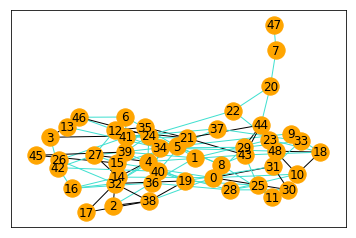

In [96]:
edge_colors3=['black' if edge in edge_list3 else 'turquoise' for edge in G.edges()]
#Creating a condition the the colours of the edges. If they are in the edge list of the edges of the trianlges, then they 
#will be black, otherwise they will be turquoise.
nx.draw_networkx(G, node_color = 'orange', edge_color =edge_colors3 , with_labels=True)
#Using my condition on the edge colours, I draw my graph again showing the edges that create triangles.
plt.xticks([])
plt.yticks([])
plt.show()
#Showing my graph.